In [3]:
#Libraries import

import os
import requests
import json
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas


Bad key "text.kerning_factor" on line 4 in
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
#Covid data import using API

resp = requests.get("https://api.covidtracking.com/v1/us/daily.json")
data = resp.text
corona_df = pd.read_json(data)

#Data cleanup
covid_df = corona_df[["date","positive", "negative", "hospitalizedCumulative","death"]]
covid_df.dropna(inplace=True)
#Change format of data column
covid_df['date'] = pd.to_datetime(covid_df['date'], format='%Y%m%d')

covid_df=covid_df.sort_values('date').set_index('date')
covid_df.head()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


positive  negative  hospitalizedCumulative  death
date                                                         
2020-03-04       281      1417                     4.0   16.0
2020-03-05       388      1949                     5.0   20.0
2020-03-06       500      2672                     6.0   26.0
2020-03-07       678      3333                     6.0   27.0
2020-03-08       876      4049                     6.0   31.0

In [5]:
# Import ETF data from Yahoo Finance with specific start and end dates

etf_df = yf.download(['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU','SPY'],
                      start='2020-03-01',
                      end='2020-12-31',
                      progress=False)
etf_df = etf_df['Close']
etf_df.head()


SPY        XLB        XLC        XLE        XLF        XLI  \
Date                                                                            
2020-03-02  309.089996  54.980000  52.520000  47.099998  27.950001  75.650002   
2020-03-03  300.239990  54.500000  50.790001  45.660000  26.900000  73.800003   
2020-03-04  312.859985  56.759998  52.619999  46.740002  27.790001  76.849998   
2020-03-05  302.459991  54.959999  50.700001  45.029999  26.450001  73.089996   
2020-03-06  297.459991  53.529999  49.820000  42.500000  25.549999  72.449997   

                  XLK        XLP       XLRE        XLU        XLV         XLY  
Date                                                                           
2020-03-02  93.480003  61.090000  38.619999  65.839996  96.949997  119.809998  
2020-03-03  89.930000  60.259998  38.590000  65.029999  94.540001  116.910004  
2020-03-04  93.790001  63.220001  40.090000  68.720001  99.989998  120.949997  
2020-03-05  90.830002  62.029999  39.169998  67.660004  97.669998  116.440002  
2020-03-06  88.910004  61.540001  38.500000  67.110001  97.150002  114.650002

## Market Comparison

In [6]:
#Set the dataframe for market comparison

market_comparison = etf_df[['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU','SPY']]
market_comparison.head()

XLC         XLY        XLP        XLE        XLF        XLV  \
Date                                                                            
2020-03-02  52.520000  119.809998  61.090000  47.099998  27.950001  96.949997   
2020-03-03  50.790001  116.910004  60.259998  45.660000  26.900000  94.540001   
2020-03-04  52.619999  120.949997  63.220001  46.740002  27.790001  99.989998   
2020-03-05  50.700001  116.440002  62.029999  45.029999  26.450001  97.669998   
2020-03-06  49.820000  114.650002  61.540001  42.500000  25.549999  97.150002   

                  XLI        XLB       XLRE        XLK        XLU         SPY  
Date                                                                           
2020-03-02  75.650002  54.980000  38.619999  93.480003  65.839996  309.089996  
2020-03-03  73.800003  54.500000  38.590000  89.930000  65.029999  300.239990  
2020-03-04  76.849998  56.759998  40.090000  93.790001  68.720001  312.859985  
2020-03-05  73.089996  54.959999  39.169998  90.830002  67.660004  302.459991  
2020-03-06  72.449997  53.529999  38.500000  88.910004  67.110001  297.459991

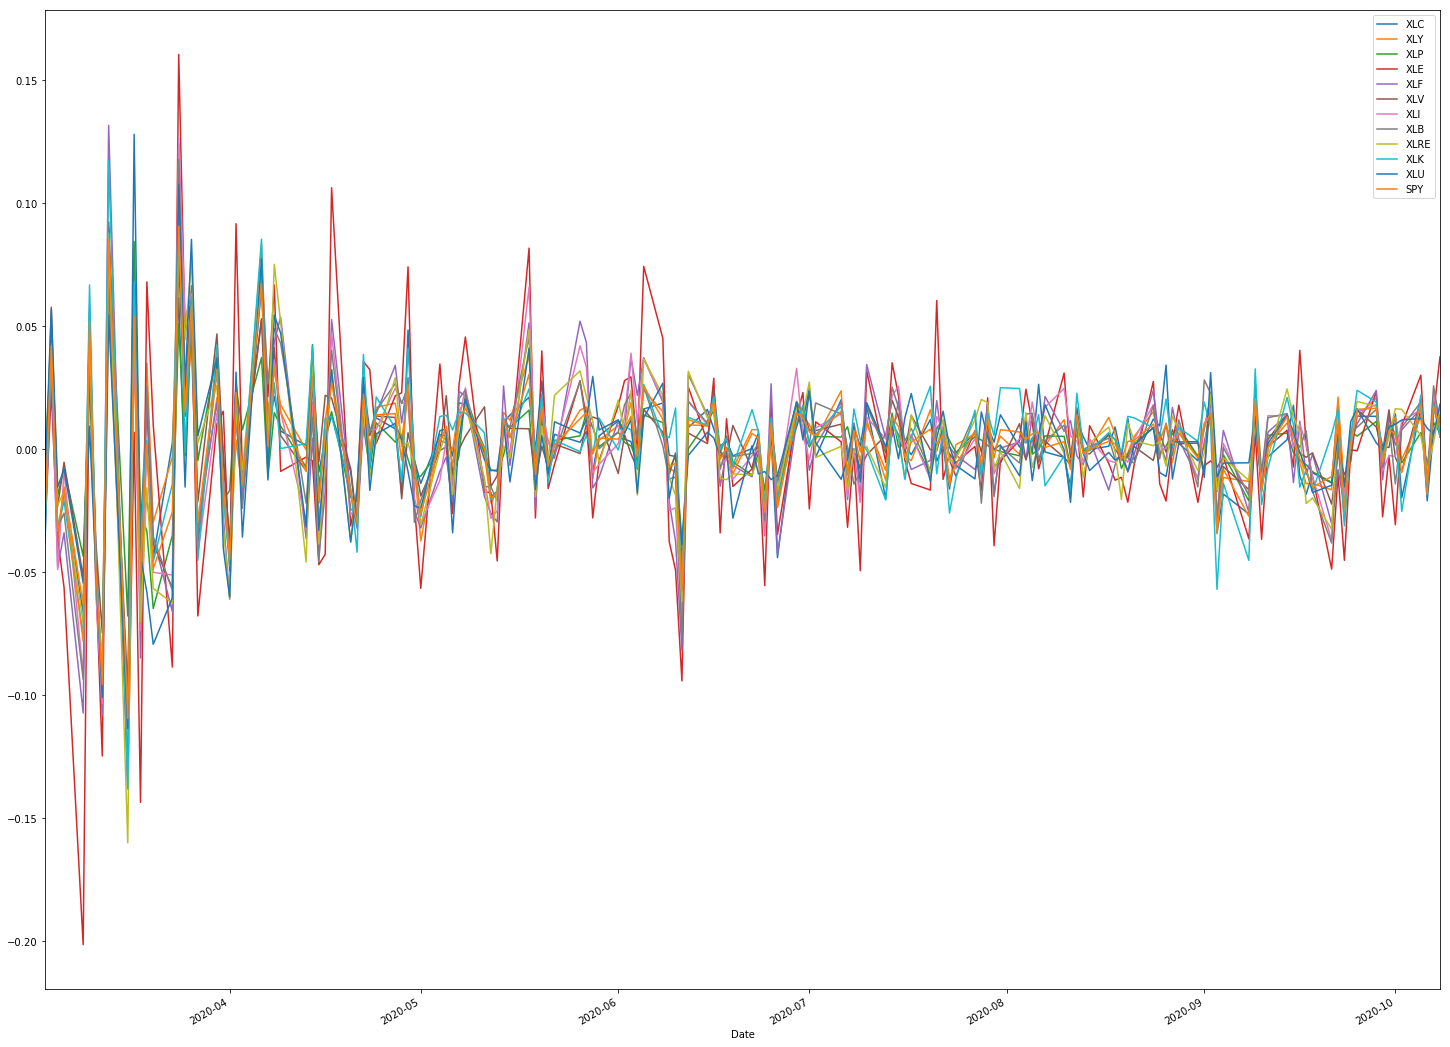

In [7]:
change_comparison=market_comparison.pct_change()
change_comparison.dropna(inplace=True)
change_comparison.plot(figsize = (25,20))

Absolute change in XLE on a daily basis is greater than all the ETFs and the index, which means Energy sector ETF had the greatest volatility during the period between March 2020 and October 2020

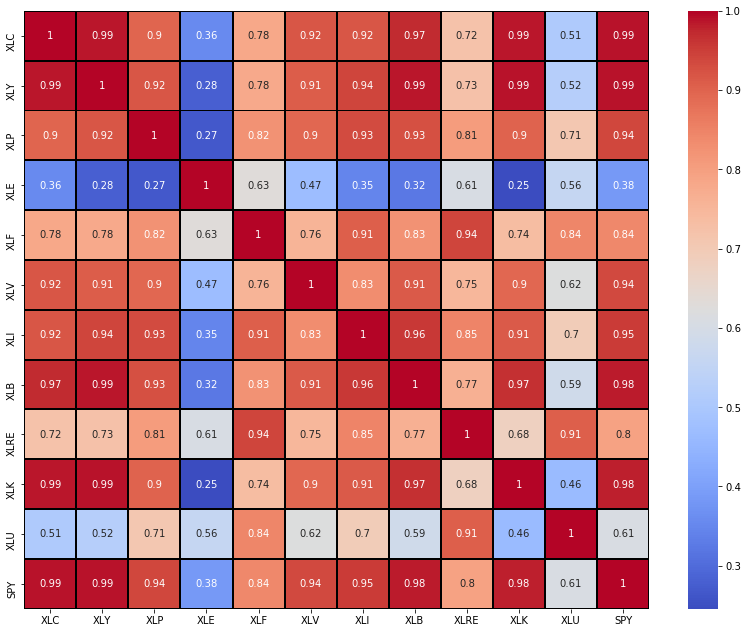

In [8]:
fig, ax = plt.subplots(figsize=(14,11))
sns.heatmap(market_comparison.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

Technology sector ETF and energy sector ETF are the only ones negatively correlated. Rest all are positively correlated to some extent.

In [9]:
def beta(ticker1, ticker2, window_size,df):
    covariance = df[ticker1].rolling(window=window_size).cov(df[ticker2])
    variance = df[ticker1].rolling(window=window_size).var()
    return covariance / variance

XLB_beta = beta('XLB','SPY',7,market_comparison)
XLC_beta = beta('XLC','SPY',7,market_comparison)
XLE_beta = beta('XLE','SPY',7,market_comparison)
XLF_beta = beta('XLF','SPY',7,market_comparison)
XLY_beta = beta('XLY','SPY',7,market_comparison)
XLP_beta = beta('XLP','SPY',7,market_comparison)
XLV_beta = beta('XLV','SPY',7,market_comparison)
XLI_beta = beta('XLI','SPY',7,market_comparison)
XLRE_beta = beta('XLRE','SPY',7,market_comparison)
XLK_beta = beta('XLK','SPY',7,market_comparison)
XLU_beta = beta('XLU','SPY',7,market_comparison)

In [10]:
XLB_beta.hvplot(label = "XLB") * XLC_beta.hvplot(label = "XLC") *  XLE_beta.hvplot(label = "XLE") * XLF_beta.hvplot(label = "XLF") *XLY_beta.hvplot(label = "XLY") * XLP_beta.hvplot(label = "XLP") * XLV_beta.hvplot(label = "XLV") * XLI_beta.hvplot(label = "XLI") * XLRE_beta.hvplot(label = "XLRE") * XLK_beta.hvplot(label = "XLK") * XLU_beta.hvplot(label = "XLU")

:Overlay
   .Curve.XLB  :Curve   [Date]   (0)
   .Curve.XLC  :Curve   [Date]   (0)
   .Curve.XLE  :Curve   [Date]   (0)
   .Curve.XLF  :Curve   [Date]   (0)
   .Curve.XLY  :Curve   [Date]   (0)
   .Curve.XLP  :Curve   [Date]   (0)
   .Curve.XLV  :Curve   [Date]   (0)
   .Curve.XLI  :Curve   [Date]   (0)
   .Curve.XLRE :Curve   [Date]   (0)
   .Curve.XLK  :Curve   [Date]   (0)
   .Curve.XLU  :Curve   [Date]   (0)

None of the 11 ETFs analyzed has a beta less than 1, which means, ETFs of all the sectors are more volatile when compared to market index.

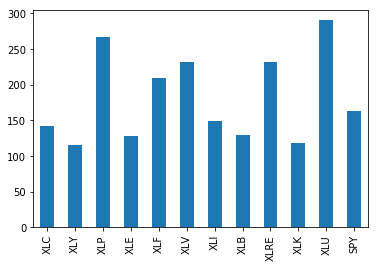

In [11]:
sharpe_ratios = (market_comparison.mean() * 252) / (market_comparison.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

XLU, XLRE, XLV, XLP out performed the market during the time period between March and October 2020. From the graph above, it is clear that, prior mentioned 4 ETFs rewarded more return per unit of risk taken, when compared to market.

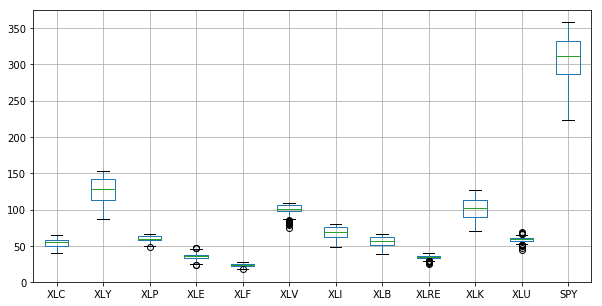

In [12]:
boxplot = market_comparison.boxplot(column=['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU','SPY'],figsize=(10,5))

Market has the largest spread with Technology sector  and Consumer Descretionary ETF next in line.
Finance sector ETF has the lowest spread

In [13]:
market_comparison.std()

XLC      6.031042
XLY     17.453827
XLP      3.591833
XLE      4.422691
XLF      1.779081
XLV      6.876427
XLI      7.370232
XLB      6.909218
XLRE     2.366911
XLK     13.585074
XLU      3.199790
SPY     29.796417
dtype: float64

### Market and Covid together

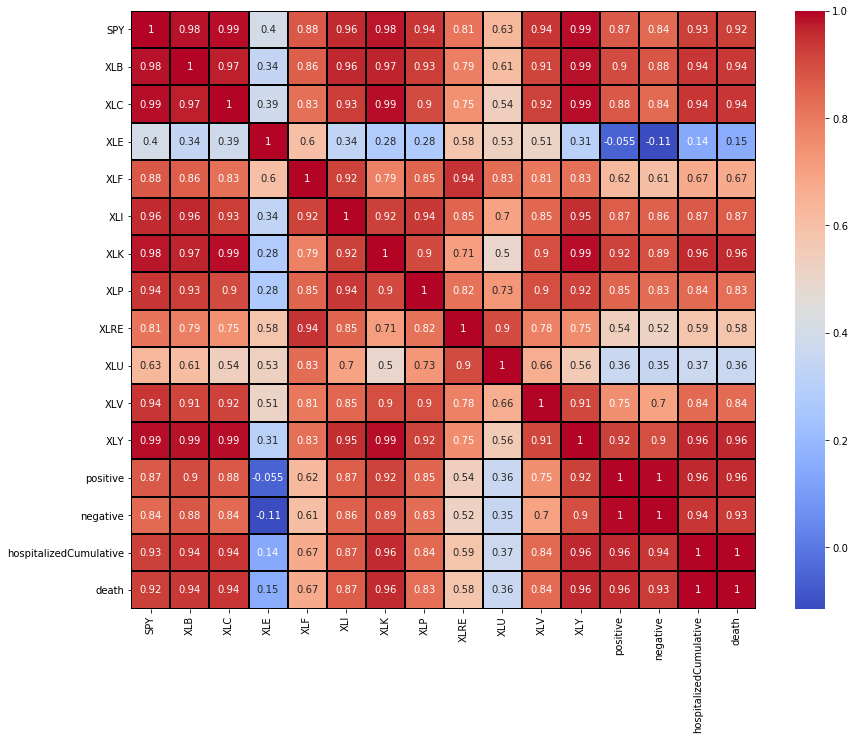

In [14]:
combined_dfs = pd.concat([etf_df,covid_df], axis="columns")
combined_dfs_nw = combined_dfs.dropna()

fig, ax = plt.subplots(figsize=(14,11))
sns.heatmap(combined_dfs_nw.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [40]:
combined_dfs_nw.std()

SPY                       2.998677e+01
XLB                       6.952545e+00
XLC                       6.063492e+00
XLE                       4.272497e+00
XLF                       1.727744e+00
XLI                       7.389386e+00
XLK                       1.363075e+01
XLP                       3.614731e+00
XLRE                      2.335806e+00
XLU                       3.119675e+00
XLV                       6.901084e+00
XLY                       1.754159e+01
positive                  2.413765e+06
negative                  3.154552e+07
hospitalizedCumulative    1.325093e+05
death                     6.480121e+04
dtype: float64

## Comparison by individual sectors with stocks and ETFs

### Materials

In [15]:
materials_df = yf.download(['HUN','EXP','NEM','FCX','SMG','SPY','XLB'],
                      start='2020-03-01',
                      end='2020-12-31',
                      progress=False)
materials_df = materials_df['Close']
materials_df = pd.concat([materials_df,covid_df], axis = "columns")
materials_df.head()

EXP    FCX        HUN        NEM         SMG         SPY  \
2020-03-02  81.650002  10.50  19.299999  46.830002  114.849998  309.089996   
2020-03-03  81.550003  10.07  18.420000  49.730000  117.169998  300.239990   
2020-03-04  85.580002  10.45  18.690001  51.000000  125.250000  312.859985   
2020-03-05  82.089996   9.99  18.559999  52.080002  118.599998  302.459991   
2020-03-06  77.849998   9.43  17.870001  52.349998  117.779999  297.459991   

                  XLB  positive  negative  hospitalizedCumulative  death  
2020-03-02  54.980000       NaN       NaN                     NaN    NaN  
2020-03-03  54.500000       NaN       NaN                     NaN    NaN  
2020-03-04  56.759998     281.0    1417.0                     4.0   16.0  
2020-03-05  54.959999     388.0    1949.0                     5.0   20.0  
2020-03-06  53.529999     500.0    2672.0                     6.0   26.0

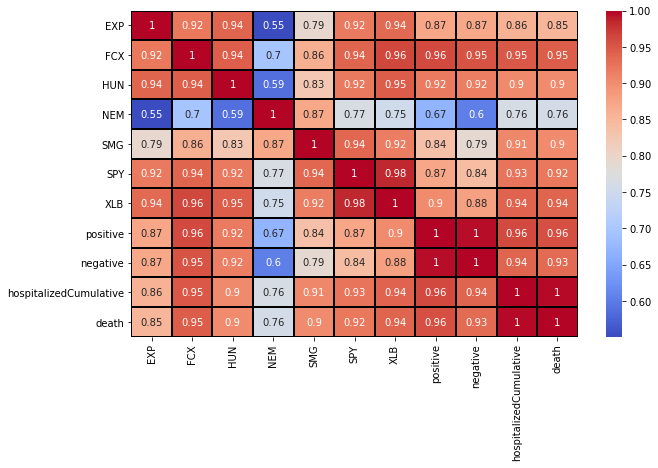

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(materials_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [17]:
EXP_beta = beta('EXP','SPY',7,materials_df)
FCX_beta = beta('FCX','SPY',7,materials_df)
HUN_beta = beta('HUN','SPY',7,materials_df)
NEM_beta = beta('NEM','SPY',7,materials_df)
SMG_beta = beta('SMG','SPY',7,materials_df)

In [18]:
XLB_beta.hvplot(label = "XLB") * EXP_beta.hvplot(label = "EXP") * FCX_beta.hvplot(label = "FCX") * HUN_beta.hvplot(label = "HUN") * NEM_beta.hvplot(label = "NEM") * SMG_beta.hvplot(label = "SMG")

:Overlay
   .Curve.XLB :Curve   [Date]   (0)
   .Curve.EXP :Curve   [index]   (0)
   .Curve.FCX :Curve   [index]   (0)
   .Curve.HUN :Curve   [index]   (0)
   .Curve.NEM :Curve   [index]   (0)
   .Curve.SMG :Curve   [index]   (0)

In [19]:
materials_df.std()

EXP                       1.225123e+01
FCX                       3.277776e+00
HUN                       2.855273e+00
NEM                       7.318360e+00
SMG                       2.177244e+01
SPY                       2.979642e+01
XLB                       6.909218e+00
positive                  2.397135e+06
negative                  3.130652e+07
hospitalizedCumulative    1.315739e+05
death                     6.443238e+04
dtype: float64

### Communications

In [20]:
communications_df = yf.download(['VIAC','T','DISCK','FB','GOOG','SPY','XLC'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
communications_df = communications_df['Close']
communications_df = pd.concat([communications_df,covid_df], axis = "columns")
communications_df.head()

DISCK          FB         GOOG         SPY          T  \
2020-01-02  30.190001  209.779999  1367.369995  324.869995  38.860001   
2020-01-03  30.020000  208.669998  1360.660034  322.410004  39.060001   
2020-01-06  29.959999  212.600006  1394.209961  323.640015  39.099998   
2020-01-07  29.990000  213.059998  1393.339966  322.730011  39.250000   
2020-01-08  30.150000  215.220001  1404.319946  324.450012  39.369999   

                 VIAC        XLC  positive  negative  hospitalizedCumulative  \
2020-01-02  42.090000  54.259998       NaN       NaN                     NaN   
2020-01-03  41.450001  53.910000       NaN       NaN                     NaN   
2020-01-06  42.060001  54.630001       NaN       NaN                     NaN   
2020-01-07  42.130001  54.700001       NaN       NaN                     NaN   
2020-01-08  41.869999  55.090000       NaN       NaN                     NaN   

            death  
2020-01-02    NaN  
2020-01-03    NaN  
2020-01-06    NaN  
2020-01-07    NaN  
2020-01-08    NaN

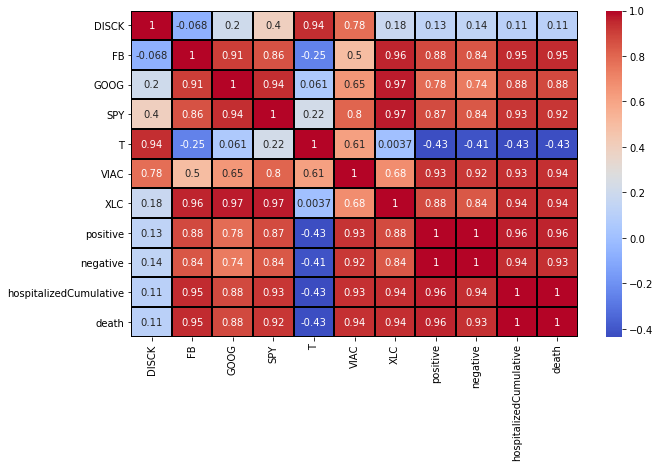

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(communications_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [22]:
DISCK_beta = beta('DISCK','SPY',7,communications_df)
FB_beta = beta('FB','SPY',7,communications_df)
GOOG_beta = beta('GOOG','SPY',7,communications_df)
T_beta = beta('T','SPY',7,communications_df)
VIAC_beta = beta('VIAC','SPY',7,communications_df)

In [23]:
XLC_beta.hvplot(label = "XLC") * DISCK_beta.hvplot(label = "DISCK") * FB_beta.hvplot(label = "FB") * GOOG_beta.hvplot(label = "GOOG") * T_beta.hvplot(label = "T") * VIAC_beta.hvplot(label = "VIAC")

:Overlay
   .Curve.XLC   :Curve   [Date]   (0)
   .Curve.DISCK :Curve   [index]   (0)
   .Curve.FB    :Curve   [index]   (0)
   .Curve.GOOG  :Curve   [index]   (0)
   .Curve.T     :Curve   [index]   (0)
   .Curve.VIAC  :Curve   [index]   (0)

In [24]:
communications_df.std()

DISCK                     3.919826e+00
FB                        3.562763e+01
GOOG                      1.324674e+02
SPY                       2.815103e+01
T                         3.617993e+00
VIAC                      7.706444e+00
XLC                       5.441645e+00
positive                  2.397135e+06
negative                  3.130652e+07
hospitalizedCumulative    1.315739e+05
death                     6.443238e+04
dtype: float64

### Energy

In [25]:
energy_df = yf.download(['OKE','COP','VLO','LNG','MUR','SPY','XLE'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
energy_df = energy_df['Close']
energy_df = pd.concat([energy_df,covid_df], axis = "columns")
energy_df.head()


COP        LNG        MUR        OKE         SPY        VLO  \
2020-01-02  65.459999  62.320000  26.549999  75.709999  324.869995  95.129997   
2020-01-03  65.699997  62.630001  27.309999  76.580002  322.410004  91.519997   
2020-01-06  66.480003  62.959999  27.420000  76.910004  323.640015  91.529999   
2020-01-07  66.480003  63.599998  27.719999  76.849998  322.730011  92.730003   
2020-01-08  64.940002  61.990002  27.090000  75.650002  324.450012  93.089996   

                  XLE  positive  negative  hospitalizedCumulative  death  
2020-01-02  60.580002       NaN       NaN                     NaN    NaN  
2020-01-03  60.400002       NaN       NaN                     NaN    NaN  
2020-01-06  60.869999       NaN       NaN                     NaN    NaN  
2020-01-07  60.709999       NaN       NaN                     NaN    NaN  
2020-01-08  59.709999       NaN       NaN                     NaN    NaN

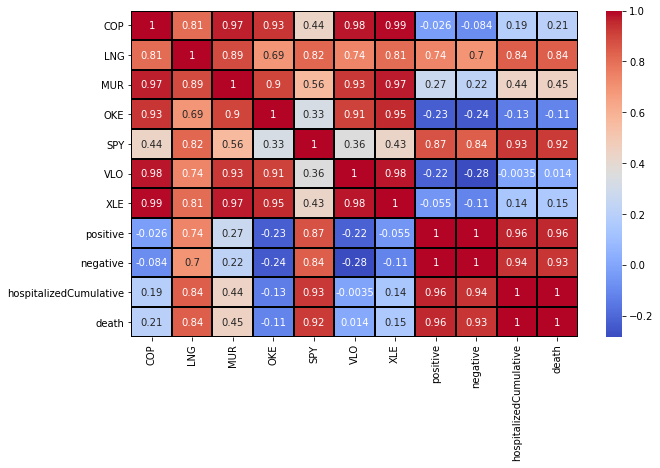

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(energy_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [27]:
OKE_beta = beta('OKE','SPY',7,energy_df)
COP_beta = beta('COP','SPY',7,energy_df)
VLO_beta = beta('VLO','SPY',7,energy_df)
LNG_beta = beta('LNG','SPY',7,energy_df)
MUR_beta = beta('MUR','SPY',7,energy_df)

In [28]:
XLC_beta.hvplot(label = "XLE") * OKE_beta.hvplot(label = "OKE") * COP_beta.hvplot(label = "COP") * VLO_beta.hvplot(label = "VLO") * LNG_beta.hvplot(label = "LNG") * MUR_beta.hvplot(label = "MUR")

:Overlay
   .Curve.XLE :Curve   [Date]   (0)
   .Curve.OKE :Curve   [index]   (0)
   .Curve.COP :Curve   [index]   (0)
   .Curve.VLO :Curve   [index]   (0)
   .Curve.LNG :Curve   [index]   (0)
   .Curve.MUR :Curve   [index]   (0)

In [29]:
energy_df.std()

COP                       1.042002e+01
LNG                       7.863085e+00
MUR                       5.783384e+00
OKE                       1.961795e+01
SPY                       2.815103e+01
VLO                       1.528369e+01
XLE                       9.168748e+00
positive                  2.397135e+06
negative                  3.130652e+07
hospitalizedCumulative    1.315739e+05
death                     6.443238e+04
dtype: float64

### Finance

In [30]:
finance_df = yf.download(['BHF','UNM','MET','CFG','LFC','SPY','XLF'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
finance_df = finance_df['Close']
finance_df = pd.concat([finance_df,covid_df], axis = "columns")
finance_df.head()

BHF        CFG    LFC        MET         SPY        UNM  \
2020-01-02  39.220001  40.750000  14.24  51.619999  324.869995  29.639999   
2020-01-03  38.990002  39.910000  13.78  51.090000  322.410004  29.059999   
2020-01-06  37.959999  39.700001  14.03  50.950001  323.640015  28.690001   
2020-01-07  37.900002  39.450001  14.22  51.290001  322.730011  28.660000   
2020-01-08  38.459999  39.759998  14.11  51.830002  324.450012  28.910000   

                  XLF  positive  negative  hospitalizedCumulative  death  
2020-01-02  31.080000       NaN       NaN                     NaN    NaN  
2020-01-03  30.750000       NaN       NaN                     NaN    NaN  
2020-01-06  30.730000       NaN       NaN                     NaN    NaN  
2020-01-07  30.530001       NaN       NaN                     NaN    NaN  
2020-01-08  30.730000       NaN       NaN                     NaN    NaN

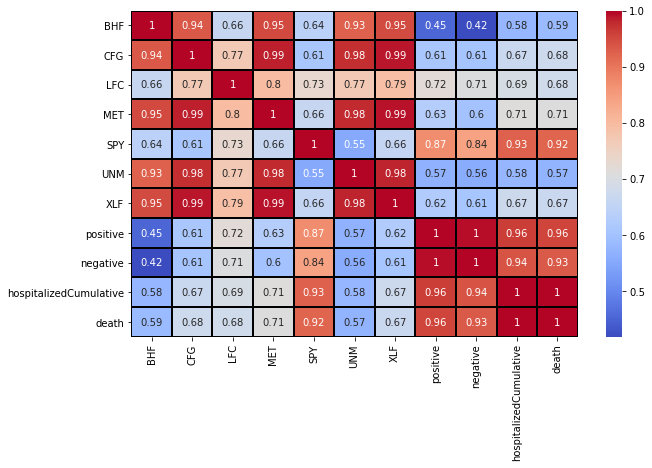

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(finance_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [32]:
BHF_beta = beta('BHF','SPY',7,finance_df)
UNM_beta = beta('UNM','SPY',7,finance_df)
MET_beta = beta('MET','SPY',7,finance_df)
CFG_beta = beta('CFG','SPY',7,finance_df)
LFC_beta = beta('LFC','SPY',7,finance_df)

In [33]:
XLF_beta.hvplot(label = "XLF") * BHF_beta.hvplot(label = "BHF") * UNM_beta.hvplot(label = "UNM") * MET_beta.hvplot(label = "MET") * CFG_beta.hvplot(label = "CFG") * LFC_beta.hvplot(label = "LFC")

:Overlay
   .Curve.XLF :Curve   [Date]   (0)
   .Curve.BHF :Curve   [index]   (0)
   .Curve.UNM :Curve   [index]   (0)
   .Curve.MET :Curve   [index]   (0)
   .Curve.CFG :Curve   [index]   (0)
   .Curve.LFC :Curve   [index]   (0)

In [34]:
finance_df.std()

BHF                       6.747725e+00
CFG                       6.625922e+00
LFC                       1.353517e+00
MET                       6.977693e+00
SPY                       2.815103e+01
UNM                       5.150790e+00
XLF                       3.299192e+00
positive                  2.397135e+06
negative                  3.130652e+07
hospitalizedCumulative    1.315739e+05
death                     6.443238e+04
dtype: float64

### Industrials

In [35]:
industrial_df = yf.download(['EAF','AL','HII','FDX','VRT','SPY','XLI'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
industrial_df = industrial_df['Close']
industrial_df = pd.concat([industrial_df,covid_df], axis = "columns")
industrial_df.head()

AL    EAF         FDX         HII         SPY    VRT  \
2020-01-02  47.320000  11.39  155.100006  255.850006  324.869995  11.22   
2020-01-03  47.619999  11.23  153.179993  263.500000  322.410004  11.24   
2020-01-06  47.189999  11.24  153.300003  265.000000  323.640015  11.32   
2020-01-07  46.540001  11.42  154.800003  267.459991  322.730011  11.41   
2020-01-08  46.720001  11.27  157.130005  268.959991  324.450012  11.45   

                  XLI  positive  negative  hospitalizedCumulative  death  
2020-01-02  83.010002       NaN       NaN                     NaN    NaN  
2020-01-03  82.849998       NaN       NaN                     NaN    NaN  
2020-01-06  82.879997       NaN       NaN                     NaN    NaN  
2020-01-07  82.709999       NaN       NaN                     NaN    NaN  
2020-01-08  82.989998       NaN       NaN                     NaN    NaN

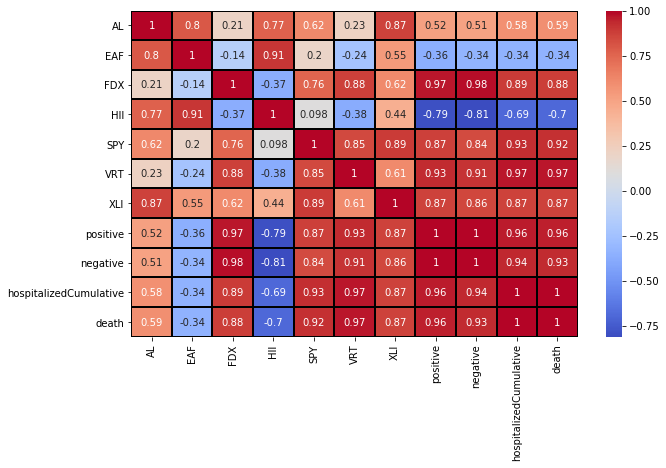

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(industrial_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [37]:
EAF_beta = beta('EAF','SPY',7,industrial_df)
AL_beta = beta('AL','SPY',7,industrial_df)
HII_beta = beta('HII','SPY',7,industrial_df)
FDX_beta = beta('FDX','SPY',7,industrial_df)
VRT_beta = beta('VRT','SPY',7,industrial_df)

In [38]:
XLI_beta.hvplot(label = "XLI") * EAF_beta.hvplot(label = "EAF") * AL_beta.hvplot(label = "AL") * HII_beta.hvplot(label = "HII") * FDX_beta.hvplot(label = "FDX") * VRT_beta.hvplot(label = "VRT")

:Overlay
   .Curve.XLI :Curve   [Date]   (0)
   .Curve.EAF :Curve   [index]   (0)
   .Curve.AL  :Curve   [index]   (0)
   .Curve.HII :Curve   [index]   (0)
   .Curve.FDX :Curve   [index]   (0)
   .Curve.VRT :Curve   [index]   (0)

In [41]:
industrial_df.std()

AL                        8.212529e+00
EAF                       1.598423e+00
FDX                       4.315134e+01
HII                       3.930484e+01
SPY                       2.815103e+01
VRT                       2.808488e+00
XLI                       8.620272e+00
positive                  2.397135e+06
negative                  3.130652e+07
hospitalizedCumulative    1.315739e+05
death                     6.443238e+04
dtype: float64

### Technology

In [42]:
technology_df = yf.download(['MSFT','DELL','NLOK','XRX','NCR','SPY','XLK'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
technology_df = technology_df['Close']
technology_df = pd.concat([technology_df,covid_df], axis = "columns")
technology_df.head()

DELL        MSFT        NCR       NLOK         SPY  \
2020-01-02  52.290001  160.619995  35.500000  26.020000  324.869995   
2020-01-03  50.570000  158.619995  35.119999  25.830000  322.410004   
2020-01-06  51.080002  159.029999  34.700001  26.389999  323.640015   
2020-01-07  49.799999  157.580002  34.610001  26.750000  322.730011   
2020-01-08  50.000000  160.089996  34.770000  26.610001  324.450012   

                  XLK        XRX  positive  negative  hospitalizedCumulative  \
2020-01-02  93.389999  36.930000       NaN       NaN                     NaN   
2020-01-03  92.339996  36.450001       NaN       NaN                     NaN   
2020-01-06  92.559998  35.900002       NaN       NaN                     NaN   
2020-01-07  92.519997  35.950001       NaN       NaN                     NaN   
2020-01-08  93.510002  35.930000       NaN       NaN                     NaN   

            death  
2020-01-02    NaN  
2020-01-03    NaN  
2020-01-06    NaN  
2020-01-07    NaN  
2020-01-08    NaN

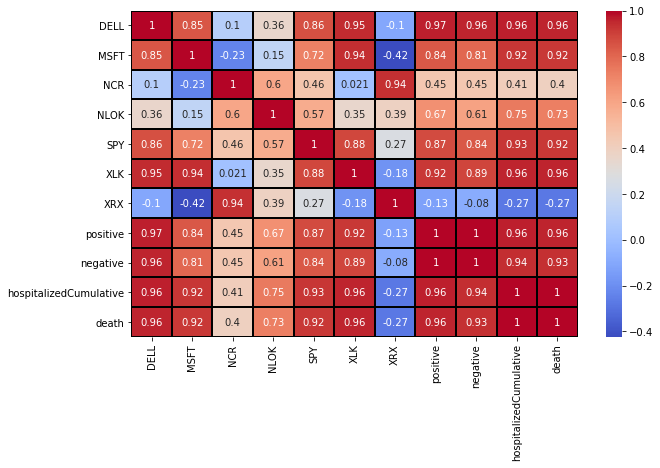

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(technology_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [44]:
MSFT_beta = beta('MSFT','SPY',7,technology_df)
DELL_beta = beta('DELL','SPY',7,technology_df)
NLOK_beta = beta('NLOK','SPY',7,technology_df)
XRX_beta = beta('XRX','SPY',7,technology_df)
NCR_beta = beta('NCR','SPY',7,technology_df)

In [45]:
XLK_beta.hvplot(label = "XLK") * MSFT_beta.hvplot(label = "MSFT") * DELL_beta.hvplot(label = "DELL") * NLOK_beta.hvplot(label = "NLOK") * XRX_beta.hvplot(label = "XRX") * NCR_beta.hvplot(label = "NCR")

:Overlay
   .Curve.XLK  :Curve   [Date]   (0)
   .Curve.MSFT :Curve   [index]   (0)
   .Curve.DELL :Curve   [index]   (0)
   .Curve.NLOK :Curve   [index]   (0)
   .Curve.XRX  :Curve   [index]   (0)
   .Curve.NCR  :Curve   [index]   (0)

In [46]:
technology_df.std()

DELL                      9.925137e+00
MSFT                      2.191006e+01
NCR                       6.206763e+00
NLOK                      2.644573e+00
SPY                       2.815103e+01
XLK                       1.233587e+01
XRX                       7.952065e+00
positive                  2.397135e+06
negative                  3.130652e+07
hospitalizedCumulative    1.315739e+05
death                     6.443238e+04
dtype: float64

### Consumer Staples

In [47]:
cs_df = yf.download(['ACI','CPB','KR','PG','KO','SPY','XLP'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
cs_df = cs_df['Close']
cs_df = pd.concat([cs_df,covid_df], axis = "columns")
cs_df.head()

ACI        CPB         KO         KR          PG         SPY  \
2020-01-02  NaN  48.490002  54.990002  28.660000  123.410004  324.869995   
2020-01-03  NaN  48.430000  54.689999  28.700001  122.580002  322.410004   
2020-01-06  NaN  48.509998  54.669998  28.799999  122.750000  323.640015   
2020-01-07  NaN  48.189999  54.250000  28.590000  121.989998  322.730011   
2020-01-08  NaN  47.349998  54.349998  28.420000  122.510002  324.450012   

                  XLP  positive  negative  hospitalizedCumulative  death  
2020-01-02  62.480000       NaN       NaN                     NaN    NaN  
2020-01-03  62.380001       NaN       NaN                     NaN    NaN  
2020-01-06  62.509998       NaN       NaN                     NaN    NaN  
2020-01-07  62.029999       NaN       NaN                     NaN    NaN  
2020-01-08  62.259998       NaN       NaN                     NaN    NaN

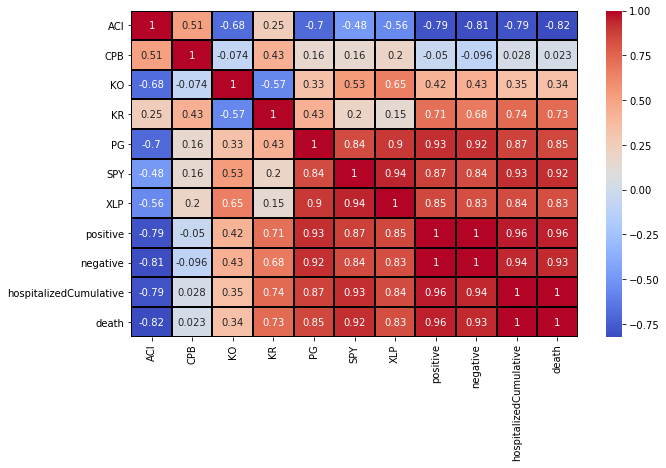

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cs_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [49]:
ACI_beta = beta('ACI','SPY',7,cs_df)
CPB_beta = beta('CPB','SPY',7,cs_df)
KR_beta = beta('KR','SPY',7,cs_df)
PG_beta = beta('PG','SPY',7,cs_df)
KO_beta = beta('KO','SPY',7,cs_df)

In [50]:
XLP_beta.hvplot(label = "XLP") * ACI_beta.hvplot(label = "ACI") * CPB_beta.hvplot(label = "CPB") * KR_beta.hvplot(label = "KR") * PG_beta.hvplot(label = "PG") * KO_beta.hvplot(label = "KO")

:Overlay
   .Curve.XLP :Curve   [Date]   (0)
   .Curve.ACI :Curve   [index]   (0)
   .Curve.CPB :Curve   [index]   (0)
   .Curve.KR  :Curve   [index]   (0)
   .Curve.PG  :Curve   [index]   (0)
   .Curve.KO  :Curve   [index]   (0)

In [51]:
cs_df.std()

ACI                       8.198765e-01
CPB                       2.146482e+00
KO                        5.011114e+00
KR                        2.447476e+00
PG                        9.424628e+00
SPY                       2.815103e+01
XLP                       3.483074e+00
positive                  2.397135e+06
negative                  3.130652e+07
hospitalizedCumulative    1.315739e+05
death                     6.443238e+04
dtype: float64

### Health Care

In [52]:
hc_df = yf.download(['BIIB','BIO','CVS','VRTX','ISRG','SPY','XLV'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
hc_df = hc_df['Close']
hc_df = pd.concat([hc_df,covid_df], axis = "columns")
hc_df.head()

BIIB         BIO        CVS        ISRG         SPY  \
2020-01-02  294.239990  372.160004  74.160004  597.260010  324.869995   
2020-01-03  290.850006  366.779999  73.570000  593.340027  322.410004   
2020-01-06  290.820007  372.029999  73.860001  595.760010  323.640015   
2020-01-07  290.089996  380.540009  73.580002  582.799988  322.730011   
2020-01-08  292.660004  381.790009  72.660004  581.780029  324.450012   

                  VRTX         XLV  positive  negative  \
2020-01-02  219.449997  102.129997       NaN       NaN   
2020-01-03  217.979996  101.239998       NaN       NaN   
2020-01-06  224.029999  101.870003       NaN       NaN   
2020-01-07  223.789993  101.669998       NaN       NaN   
2020-01-08  231.089996  102.330002       NaN       NaN   

            hospitalizedCumulative  death  
2020-01-02                     NaN    NaN  
2020-01-03                     NaN    NaN  
2020-01-06                     NaN    NaN  
2020-01-07                     NaN    NaN  
2020-01-08                     NaN    NaN

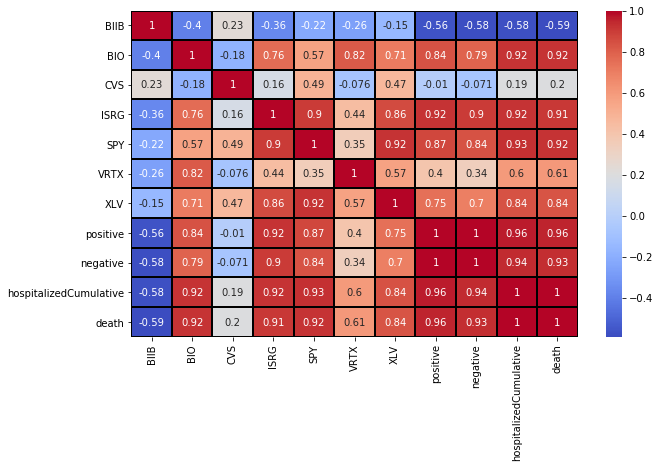

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(hc_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [54]:
BIIB_beta = beta('BIIB','SPY',7,hc_df)
BIO_beta = beta('BIO','SPY',7,hc_df)
CVS_beta = beta('CVS','SPY',7,hc_df)
VRTX_beta = beta('VRTX','SPY',7,hc_df)
ISRG_beta = beta('ISRG','SPY',7,hc_df)

In [55]:
XLV_beta.hvplot(label = "XLV") * BIIB_beta.hvplot(label = "BIIB") * BIO_beta.hvplot(label = "BIO") * CVS_beta.hvplot(label = "CVS") * VRTX_beta.hvplot(label = "VRTX") * ISRG_beta.hvplot(label = "ISRG")

:Overlay
   .Curve.XLV  :Curve   [Date]   (0)
   .Curve.BIIB :Curve   [index]   (0)
   .Curve.BIO  :Curve   [index]   (0)
   .Curve.CVS  :Curve   [index]   (0)
   .Curve.VRTX :Curve   [index]   (0)
   .Curve.ISRG :Curve   [index]   (0)

In [56]:
hc_df.std()

BIIB                      2.059337e+01
BIO                       6.305592e+01
CVS                       5.107128e+00
ISRG                      8.123603e+01
SPY                       2.815103e+01
VRTX                      2.408965e+01
XLV                       6.296140e+00
positive                  2.397135e+06
negative                  3.130652e+07
hospitalizedCumulative    1.315739e+05
death                     6.443238e+04
dtype: float64

### Consumer Discretionary

In [57]:
cd_df = yf.download(['ARD','MGM','EBAY','MCD','ROST','SPY','XLY'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
cd_df = cd_df['Close']
cd_df = pd.concat([cd_df,covid_df], axis = "columns")
cd_df.head()

ARD       EBAY         MCD        MGM        ROST  \
2020-01-02  19.480000  36.299999  200.789993  33.660000  116.830002   
2020-01-03  19.240000  35.959999  200.080002  33.290001  116.860001   
2020-01-06  19.590000  35.779999  202.330002  32.889999  117.430000   
2020-01-07  19.469999  35.619999  202.630005  32.910000  118.800003   
2020-01-08  19.520000  35.599998  205.910004  33.240002  119.150002   

                   SPY         XLY  positive  negative  \
2020-01-02  324.869995  126.910004       NaN       NaN   
2020-01-03  322.410004  125.830002       NaN       NaN   
2020-01-06  323.640015  126.180000       NaN       NaN   
2020-01-07  322.730011  125.980003       NaN       NaN   
2020-01-08  324.450012  126.360001       NaN       NaN   

            hospitalizedCumulative  death  
2020-01-02                     NaN    NaN  
2020-01-03                     NaN    NaN  
2020-01-06                     NaN    NaN  
2020-01-07                     NaN    NaN  
2020-01-08                     NaN    NaN

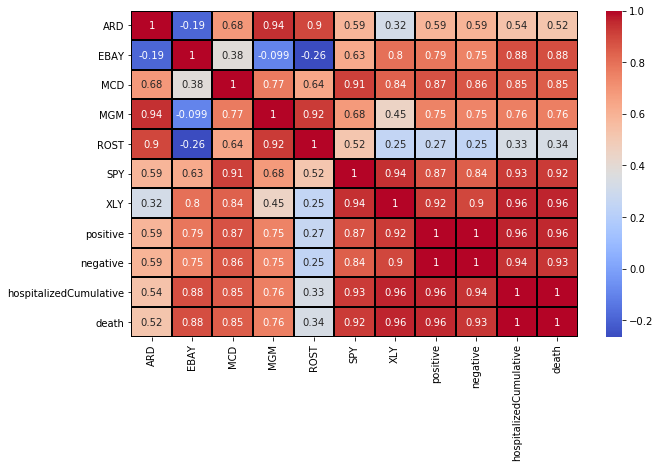

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cd_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [59]:
ARD_beta = beta('ARD','SPY',7,cd_df)
MGM_beta = beta('MGM','SPY',7,cd_df)
EBAY_beta = beta('EBAY','SPY',7,cd_df)
MCD_beta = beta('MCD','SPY',7,cd_df)
ROST_beta = beta('ROST','SPY',7,cd_df)

In [60]:
XLY_beta.hvplot(label = "XLY") * ARD_beta.hvplot(label = "ARD") * MGM_beta.hvplot(label = "MGM") * EBAY_beta.hvplot(label = "EBAY") * ROST_beta.hvplot(label = "ROST") * MCD_beta.hvplot(label = "MCD")

:Overlay
   .Curve.XLY  :Curve   [Date]   (0)
   .Curve.ARD  :Curve   [index]   (0)
   .Curve.MGM  :Curve   [index]   (0)
   .Curve.EBAY :Curve   [index]   (0)
   .Curve.ROST :Curve   [index]   (0)
   .Curve.MCD  :Curve   [index]   (0)

In [61]:
cd_df.std()

ARD                       2.962021e+00
EBAY                      9.300283e+00
MCD                       1.847472e+01
MGM                       6.718692e+00
ROST                      1.337227e+01
SPY                       2.815103e+01
XLY                       1.563590e+01
positive                  2.397135e+06
negative                  3.130652e+07
hospitalizedCumulative    1.315739e+05
death                     6.443238e+04
dtype: float64

In [62]:
### Real Estate

In [63]:
re_df = yf.download(['ACLD','AGNC','ADC','ALX','ARE','SPY','XLRE'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
re_df = re_df['Close']
re_df = pd.concat([re_df,covid_df], axis = "columns")
re_df.head()

ACLD        ADC       AGNC         ALX         ARE         SPY  \
2020-01-02  0.08  67.660004  17.780001  328.519989  159.729996  324.869995   
2020-01-03  0.08  69.260002  17.730000  332.609985  160.639999  322.410004   
2020-01-06  0.08  69.980003  17.730000  337.470001  161.029999  323.640015   
2020-01-07  0.08  69.989998  17.930000  327.359985  155.759995  322.730011   
2020-01-08  0.08  69.870003  17.879999  330.899994  157.830002  324.450012   

                 XLRE  positive  negative  hospitalizedCumulative  death  
2020-01-02  38.220001       NaN       NaN                     NaN    NaN  
2020-01-03  38.500000       NaN       NaN                     NaN    NaN  
2020-01-06  38.509998       NaN       NaN                     NaN    NaN  
2020-01-07  38.090000       NaN       NaN                     NaN    NaN  
2020-01-08  38.279999       NaN       NaN                     NaN    NaN

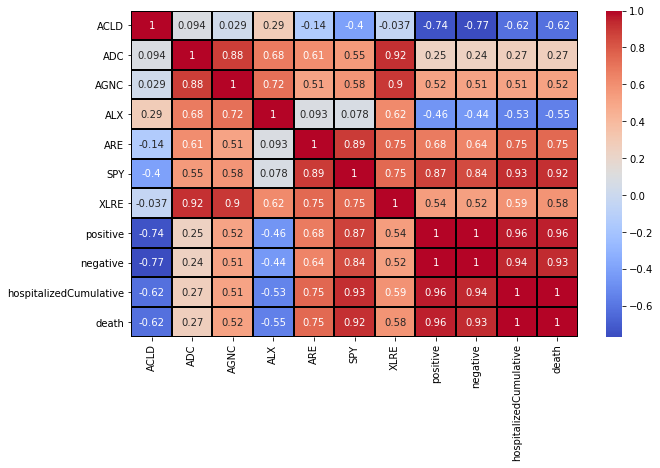

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(re_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [65]:
ACLD_beta = beta('ACLD','SPY',7,re_df)
AGNC_beta = beta('AGNC','SPY',7,re_df)
ADC_beta = beta('ADC','SPY',7,re_df)
ALX_beta = beta('ALX','SPY',7,re_df)
ARE_beta = beta('ARE','SPY',7,re_df)

In [66]:
XLRE_beta.hvplot(label = "XLRE") * ACLD_beta.hvplot(label = "ACLD") * AGNC_beta.hvplot(label = "AGNC") * ADC_beta.hvplot(label = "ADC") * ALX_beta.hvplot(label = "ALX") * ARE_beta.hvplot(label = "ARE")

:Overlay
   .Curve.XLRE :Curve   [Date]   (0)
   .Curve.ACLD :Curve   [index]   (0)
   .Curve.AGNC :Curve   [index]   (0)
   .Curve.ADC  :Curve   [index]   (0)
   .Curve.ALX  :Curve   [index]   (0)
   .Curve.ARE  :Curve   [index]   (0)

In [67]:
re_df.std()

ACLD                      2.113999e-02
ADC                       5.600243e+00
AGNC                      2.509575e+00
ALX                       3.298561e+01
ARE                       1.169445e+01
SPY                       2.815103e+01
XLRE                      3.034067e+00
positive                  2.397135e+06
negative                  3.130652e+07
hospitalizedCumulative    1.315739e+05
death                     6.443238e+04
dtype: float64

### Utilities

In [68]:
utilities_df = yf.download(['NRG','SRE','PPL','AWK','BIP','SPY','XLU'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
utilities_df = utilities_df['Close']
utilities_df = pd.concat([utilities_df,covid_df], axis = "columns")
utilities_df.head()

AWK        BIP        NRG        PPL         SPY  \
2020-01-02  120.199997  44.687500  38.799999  35.419998  324.869995   
2020-01-03  120.980003  44.866070  38.200001  35.380001  322.410004   
2020-01-06  120.750000  45.008930  37.380001  35.419998  323.640015   
2020-01-07  120.000000  44.785713  36.869999  35.180000  322.730011   
2020-01-08  120.489998  44.776787  36.860001  35.380001  324.450012   

                   SRE        XLU  positive  negative  hospitalizedCumulative  \
2020-01-02  149.119995  63.810001       NaN       NaN                     NaN   
2020-01-03  147.759995  63.939999       NaN       NaN                     NaN   
2020-01-06  149.000000  64.000000       NaN       NaN                     NaN   
2020-01-07  148.880005  63.910000       NaN       NaN                     NaN   
2020-01-08  149.899994  63.880001       NaN       NaN                     NaN   

            death  
2020-01-02    NaN  
2020-01-03    NaN  
2020-01-06    NaN  
2020-01-07    NaN  
2020-01-08    NaN

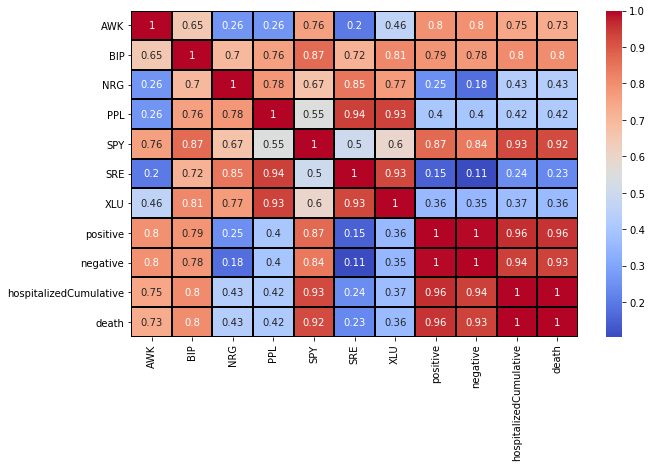

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(utilities_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [70]:
NRG_beta = beta('NRG','SPY',7,utilities_df)
SRE_beta = beta('SRE','SPY',7,utilities_df)
PPL_beta = beta('PPL','SPY',7,utilities_df)
AWK_beta = beta('AWK','SPY',7,utilities_df)
BIP_beta = beta('BIP','SPY',7,utilities_df)

In [71]:
XLU_beta.hvplot(label = "XLU") * NRG_beta.hvplot(label = "NRG") * SRE_beta.hvplot(label = "SRE") * PPL_beta.hvplot(label = "PPL") * AWK_beta.hvplot(label = "AWK") * BIP_beta.hvplot(label = "BIP")

:Overlay
   .Curve.XLU :Curve   [Date]   (0)
   .Curve.NRG :Curve   [index]   (0)
   .Curve.SRE :Curve   [index]   (0)
   .Curve.PPL :Curve   [index]   (0)
   .Curve.AWK :Curve   [index]   (0)
   .Curve.BIP :Curve   [index]   (0)

In [72]:
utilities_df.std()

AWK                       1.055401e+01
BIP                       4.651067e+00
NRG                       3.569341e+00
PPL                       4.142376e+00
SPY                       2.815103e+01
SRE                       1.559509e+01
XLU                       4.718305e+00
positive                  2.397135e+06
negative                  3.130652e+07
hospitalizedCumulative    1.315739e+05
death                     6.443238e+04
dtype: float64